In [77]:
import pandas as pd
import numpy as np

#from feature_selector import FeatureSelector
from feature_selector_lightgbm import FeatureSelector

In [78]:
#load in the file (application_train.csv)
#app_train = pd.read_csv("C:/SHARYU/NEU/Unsupervised2/Project/application_train.csv/application_train.csv",  header=0, sep=',', quotechar='"')

app_test = pd.read_csv('C:\\Users\\somya\\Documents\\CS 6220 Data Mining Techniques\\Project\\New folder\\Data without Missing Value\\application_train.csv')

In [79]:
train = pd.read_csv('C:\\Users\\somya\\Documents\\CS 6220 Data Mining Techniques\\Project\\New folder\\Data without Missing Value\\application_train.csv')
train_features = train
train_labels = train['TARGET']
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
train_features["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### RANDOM OVER SAMPLING

Random over-sampling:
1    282686
0    282686
Name: TARGET, dtype: int64


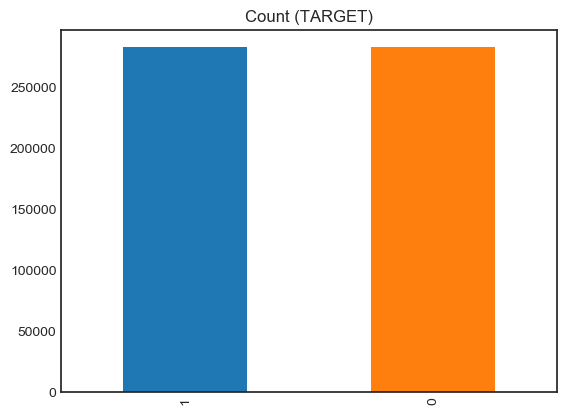

In [194]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.TARGET.value_counts())

df_test_over.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [195]:
train_labels = df_test_over['TARGET']

In [196]:
train = df_test_over.drop(columns = ['TARGET'])

In [197]:
fs = FeatureSelector(data = train, labels = train_labels)

In [198]:
fs.identify_missing(missing_threshold=0.6)

23 features with greater than 0.60 missing values.



In [199]:
missing_features = fs.ops['missing']
missing_features[:10]

['OWN_CAR_AGE',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE']

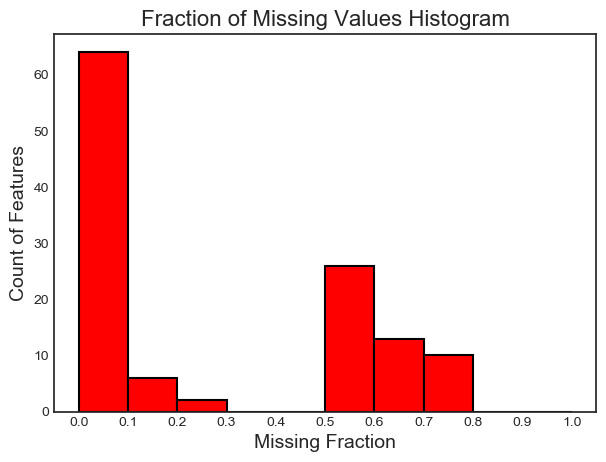

In [200]:
fs.plot_missing()

In [201]:

fs.missing_stats.head(10)

,missing_fraction
COMMONAREA_AVG,0.718101
COMMONAREA_MODE,0.718101
COMMONAREA_MEDI,0.718101
NONLIVINGAPARTMENTS_AVG,0.714185
NONLIVINGAPARTMENTS_MODE,0.714185
NONLIVINGAPARTMENTS_MEDI,0.714185
FONDKAPREMONT_MODE,0.704610
LIVINGAPARTMENTS_MEDI,0.704582
LIVINGAPARTMENTS_AVG,0.704582
LIVINGAPARTMENTS_MODE,0.704582


In [202]:
fs.identify_single_unique()

0 features with a single unique value.



In [203]:
single_unique = fs.ops['single_unique']
single_unique

[]

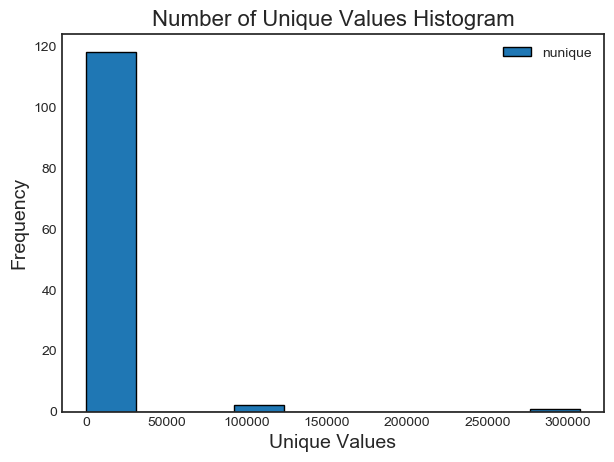

In [204]:
fs.plot_unique()

In [205]:
fs.unique_stats.sample(5)

,nunique
REGION_RATING_CLIENT,3
LIVINGAREA_MEDI,5281
REG_REGION_NOT_WORK_REGION,2
BASEMENTAREA_MEDI,3772
FONDKAPREMONT_MODE,4


In [206]:
fs.identify_collinear(correlation_threshold=0.975)


25 features with a correlation magnitude greater than 0.97.



In [207]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE']

In [208]:
fs.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,AMT_CREDIT,0.985398,AMT_GOODS_PRICE
1,DAYS_EMPLOYED,-0.999689,FLAG_EMP_PHONE
2,YEARS_BEGINEXPLUATATION_AVG,0.977190,YEARS_BEGINEXPLUATATION_MODE
3,YEARS_BUILD_AVG,0.989140,YEARS_BUILD_MODE
4,COMMONAREA_AVG,0.979564,COMMONAREA_MODE


In [209]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.861537
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.861071
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862696
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862049
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862782
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862293
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[10

In [210]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 121 original features
There are 140 one-hot features


In [211]:
fs.data_all.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [212]:

zero_importance_features= fs.ops['zero_importance']
zero_importance_features

['FLAG_DOCUMENT_12',
 'NAME_INCOME_TYPE_Student',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_INCOME_TYPE_Businessman',
 'FLAG_MOBIL',
 'ORGANIZATION_TYPE_Industry: type 8',
 'ORGANIZATION_TYPE_Industry: type 13',
 'ORGANIZATION_TYPE_Industry: type 6',
 'ORGANIZATION_TYPE_XNA',
 'CODE_GENDER_XNA',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'NAME_FAMILY_STATUS_Unknown',
 'ORGANIZATION_TYPE_Religion']

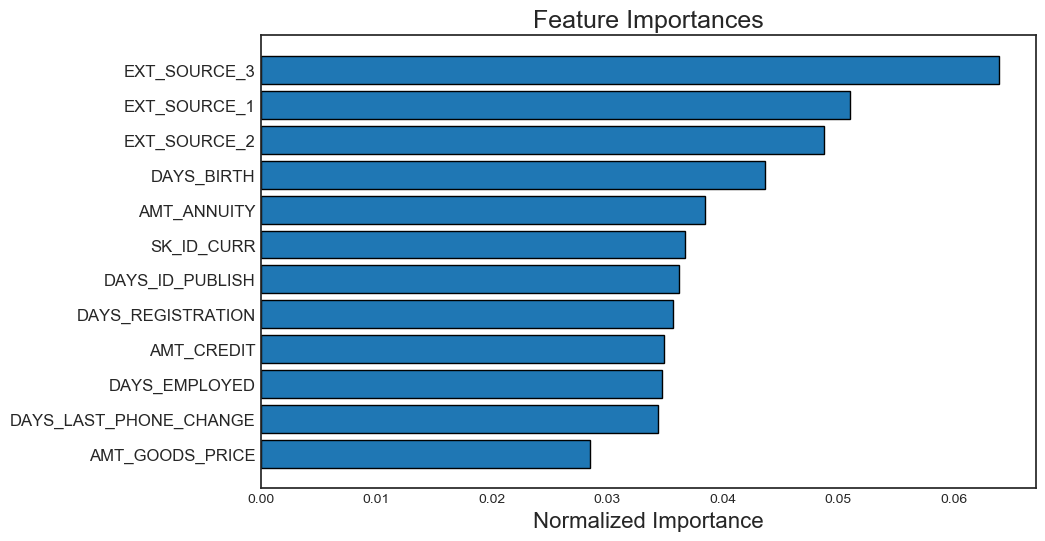

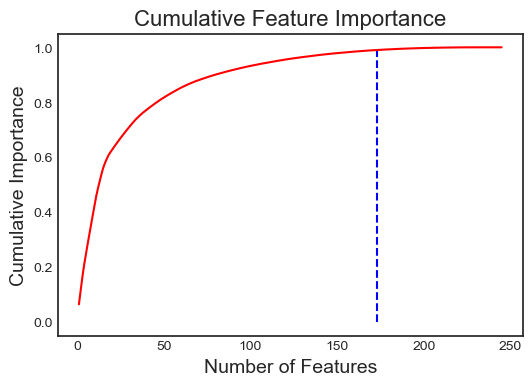

173 features required for 0.99 of cumulative importance


In [213]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [214]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_3,1916.3,0.063877,0.063877
1,EXT_SOURCE_1,1530.6,0.051020,0.114897
2,EXT_SOURCE_2,1461.5,0.048717,0.163613
3,DAYS_BIRTH,1309.9,0.043663,0.207277
4,AMT_ANNUITY,1152.9,0.038430,0.245707
5,SK_ID_CURR,1101.6,0.036720,0.282427
6,DAYS_ID_PUBLISH,1085.8,0.036193,0.318620
7,DAYS_REGISTRATION,1071.4,0.035713,0.354333
8,AMT_CREDIT,1047.2,0.034907,0.389240
9,DAYS_EMPLOYED,1041.8,0.034727,0.423967


In [215]:
fs.identify_low_importance(cumulative_importance = 0.99)

172 features required for cumulative importance of 0.99 after one hot encoding.
73 features do not contribute to cumulative importance of 0.99.



In [216]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['FLAG_DOCUMENT_2',
 'ORGANIZATION_TYPE_Transport: type 1',
 'ORGANIZATION_TYPE_Services',
 'ORGANIZATION_TYPE_Postal',
 'ORGANIZATION_TYPE_Trade: type 6']

In [217]:

fs=  FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

23 features with greater than 0.60 missing values.

0 features with a single unique value.

22 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862302
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.86461
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862482
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862806
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.862237
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iterati

In [218]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'], keep_one_hot = False)

Removed 168 features including one-hot features.


In [219]:
train_no_missing_zero

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,652500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [220]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 187 features including one-hot features.


In [221]:
train_removed_all

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,"Spouse, partner",...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,Unaccompanied,...,1,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Children,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [222]:
train_removed_all.shape

(565372, 74)

In [223]:
train_removed_all.to_csv('app_train_removed_all_76.csv')

### RANDOM UNDER SAMPLING

In [111]:
df_test_under.shape

(49650, 122)

**Encoding on the train file**

In [224]:
train=train_removed_all

In [225]:
#Label Encoder

# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            #app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [226]:
# One-Hot encoding of categorical variables

train = pd.get_dummies(train)
#app_test = pd.get_dummies(app_test)

print('Training Features shape: ', train.shape)

Training Features shape:  (565372, 192)


**Load test set**

In [227]:
test = pd.read_csv('C:\\Users\\somya\\Documents\\CS 6220 Data Mining Techniques\\Project\\New folder\\Data without Missing Value\\application_train.csv')

In [228]:
###### train = pd.read_csv("C:/SHARYU/NEU/Unsupervised2/Project/application_train.csv/application_train.csv",  header=0, sep=',', quotechar='"')
test_features = test
#train_labels = train['TARGET']
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Encoding test set**

In [229]:
#Label Encoder

# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in test:
    if test[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(test[col].unique())) <= 2:
            # Train on the training data
            le.fit(test[col])
            # Transform both training and testing data
            test[col] = le.transform(test[col])
            #app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [230]:
# One-Hot encoding of categorical variables

test = pd.get_dummies(test)


print('Training Features shape: ', test.shape)

Training Features shape:  (307511, 243)


**Align train test**

In [231]:

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (565372, 193)
Testing Features shape:  (307511, 192)


**Impute missing values in train and test set**

In [232]:
# Impute missing values

from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in train:
    train1 = train.drop(columns = ['TARGET'])
else:
    train1 = train.copy()
    
# Feature names
features = list(train1.columns)

# Copy of the testing data
test1 = test.copy()

# Mode imputation of missing values
imputer = Imputer(strategy = 'most_frequent')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train1)

# Transform both training and testing data
train1 = imputer.transform(train1)
test1 = imputer.transform(test1)

# Repeat with the scaler
scaler.fit(train1)
train1 = scaler.transform(train1)
test1 = scaler.transform(test1)

print('Training data shape: ', train1.shape)
print('Testing data shape: ', test1.shape)

Training data shape:  (565372, 192)
Testing data shape:  (307511, 192)


In [233]:
from sklearn.model_selection import train_test_split

# create training and testing vars

X_train, X_validate, y_train, y_validate = train_test_split(df_x_smt, df_y_smt, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_validate.shape, y_validate.shape)

(448326, 122) (448326, 1)
(112082, 122) (112082, 1)


In [234]:
from sklearn import linear_model

In [235]:
logistic = linear_model.LogisticRegression(C=1e5)

In [236]:
logistic.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [237]:
logistic_score = logistic.score(X_validate, y_validate)

In [238]:
logistic_score

0.6444388929533734